In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv(r"file:///C:\Users\ajity\Downloads\files%20for%20ML\ML%20Notes\ML%20PROJECT%201\bank-marketing.csv")

# exploratory data analysis

In [3]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#here we have got the mean and median value of numerical values but here in (pdays mean, min,25,50,75 is nearby -1 but max value is around 871 which makes clear that the outlier is present also previous column is also looking fishy

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [6]:
df.shape

(45211, 19)

In [7]:
df["pdays"].describe()      

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

#here mean value is 40 std is 100 it and max value is 871 so its clear that outlier is present and we need to clear that 

Here the pdays cannot be -negative, so it should be made to 0

In [8]:
df["balance"].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

here 75% suggest that 75% values are below or equal to 1428 and mean and std show that outliers are present so we need to c
clear this outliers

here the columns

previous

campaign

duration

balance

pdays 
have an outliers

In [12]:
#here first we will check for the null values
df.isnull().sum()/df.shape[0]*100

age          0.0
job          0.0
salary       0.0
marital      0.0
education    0.0
targeted     0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
response     0.0
dtype: float64

here the null values are not present 

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

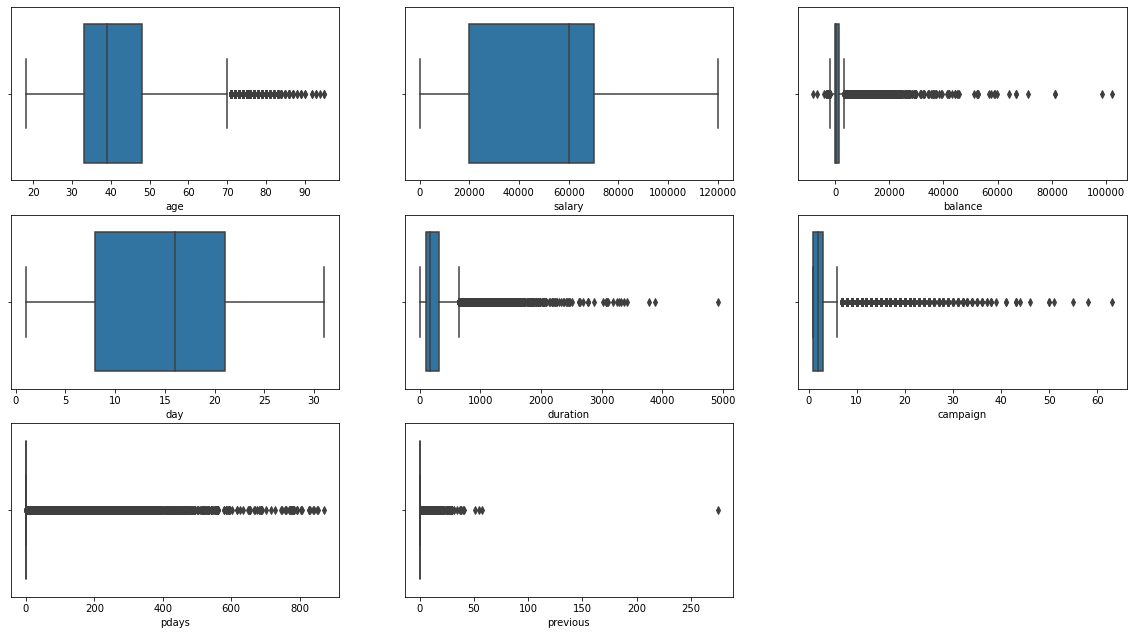

In [13]:
# now before moving forward we will analyze again by using pairplot 
plt.figure(figsize = (20,30))
x=1
for column in df.describe().columns:
    plt.subplot(8,3,x)
    sns.boxplot(df[column])
    x+=1
plt.tight_layout

# Removing an outliers

we are not going to remove the outliers instead of that we are going to fill the outlier values by lower and upper value because the outliers are more and remvoing them affect the data

In [14]:
# previous
#q1 = df.previous.quantile(0.25)
#q3 = df.previous.quantile(0.75)
#iqr = q3-q1
#lower = q1-1.5*iqr
#upper = q3+1.5*iqr

In [15]:
#df["previous"] = np.where(df["previous"]>upper,upper,np.where(df["previous"]<lower,lower,df["previous"]))

In [16]:
#sns.boxplot(y = "previous",data = df)

#here as we seee that after doing this the result has changed completely and we lost the data completely, so we need to change out approach
and instead of filling with lower and upper values we need to fill it with 0 or na values but here already the mean, 25,50,75% is 0, this proves that we need to keep it untouched.

In [17]:
#Campaign
q1 = df.campaign.quantile(0.25)
q3 = df.campaign.quantile(0.75)
iqr = q3-q1
lower = q1-1.5*iqr
upper = q3+1.5*iqr

In [18]:
df["campaign"] = np.where(df["campaign"]>upper,upper,np.where(df["campaign"]<lower,lower,df["campaign"]))

<AxesSubplot:ylabel='campaign'>

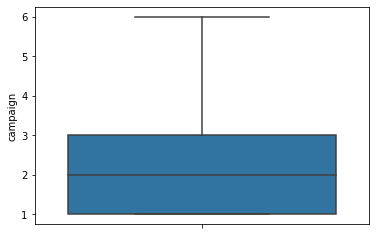

In [19]:
sns.boxplot(y = "campaign",data = df)

In [20]:
#now here we are done with campaign and now we will solve duration

#duration
q1 = df.duration.quantile(0.25)
q3 = df.duration.quantile(0.75)
iqr = q3-q1
lower = q1-1.5*iqr
upper = q3+1.5*iqr


In [21]:
df["duration"] = np.where(df["duration"]>upper,upper,np.where(df["duration"]<lower,lower,df["duration"]))

<AxesSubplot:ylabel='duration'>

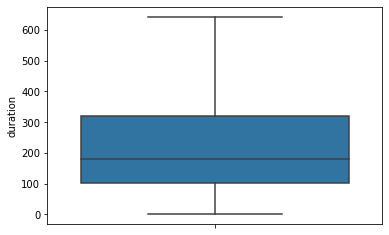

In [22]:
sns.boxplot(y = "duration",data = df)

here we have removed the outliers of duration now we will remove the outliers of 

balance

In [23]:
#balance
q1 = df.balance.quantile(0.25)
q3 = df.balance.quantile(0.75)
iqr = q3-q1
lower = q1-1.5*iqr
upper = q3+1.5*iqr

In [24]:
df["balance"] = np.where(df["balance"]>upper,upper,np.where(df["balance"]<lower,lower,df["balance"]))

<AxesSubplot:ylabel='balance'>

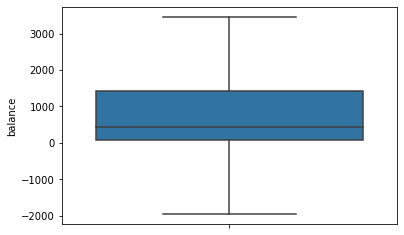

In [25]:
sns.boxplot(y = "balance",data = df)

In [26]:
#q1 = df.pdays.quantile(0.25)
#q3 = df.pdays.quantile(0.75)
#iqr = q3-q1
#lower = q1-1.5*iqr
#upper = q3+1.5*iqr

In [27]:
#df["pdays"] = np.where(df["pdays"]>upper,upper,np.where(df["pdays"]<lower,lower,df["pdays"]))

In [28]:
#sns.boxplot(y = "pdays", data = df)

#now we have cleared all the outliers value and filled them with lower and uppper values, so there are not more null and 
outlier values, now we will see the barplot and conclude our result by which which factor out result is changing

But here the result has changed completely and it has became -1 which says that it is wrong approach, so we need to remove 
-1 and fill it with zero or na values

i.e we will drop the values which are less than zero 


In [28]:
df.drop(df[df['pdays']<0].index, inplace = True)

In [29]:
df.pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

<AxesSubplot:ylabel='pdays'>

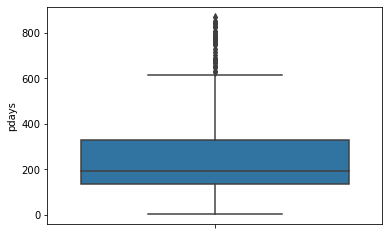

In [30]:
sns.boxplot(y= 'pdays',data=df)

#here after making the boxplot of pdays we see that the outliers are present

analyze : Here after finding that the values are wrong we limited ourself within zero and now we see that there is high with
in the values. the mean,min,25%,75% have changed significantly

<AxesSubplot:ylabel='education'>

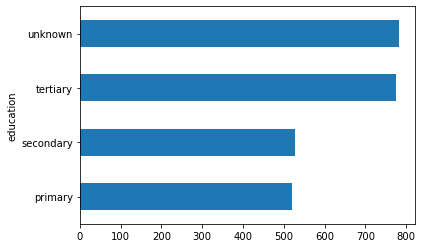

In [31]:
#now we will plot the graph for analyzing the balance and education difference
df.groupby(['education'])['balance'].median().plot.barh()

In [33]:
#here we will convert categorical values into numerical values
df.response.value_counts(normalize = True)    #

no     0.883015
yes    0.116985
Name: response, dtype: float64

#here we are setting normalize = true to get the value in percentage

here we have got the percentage value of response, so we can replace them with 0 and 1 instead of using pd.get_dummies

In [34]:
df.replace({'response':{'yes':1,'no':0}},inplace= True)        

In [35]:
df.response.value_counts()

0    39922
1     5289
Name: response, dtype: int64

# as we all know that we can perform bivarite analysis in foll ways
categorical to categorical

numerical to numerical

categorical to numerical or vice versa

<AxesSubplot:xlabel='marital', ylabel='response'>

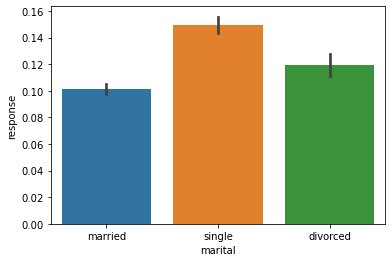

In [36]:
sns.barplot(x ='marital', y = 'response', data = df )

<AxesSubplot:xlabel='education', ylabel='response'>

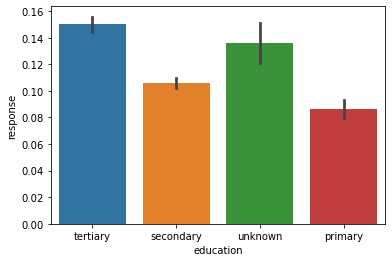

In [37]:
sns.barplot(x = 'education', y = 'response', data = df)

<AxesSubplot:xlabel='targeted', ylabel='response'>

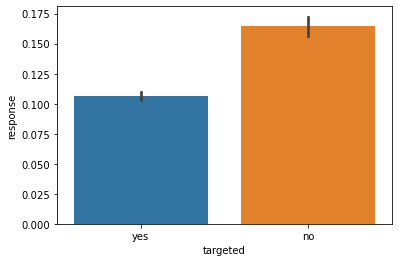

In [38]:
sns.barplot(x = 'targeted', y = "response", data = df)

<AxesSubplot:xlabel='default', ylabel='response'>

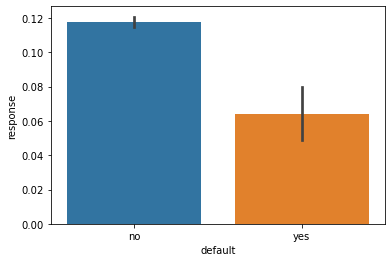

In [39]:
sns.barplot(x = 'default', y = 'response', data = df)

<AxesSubplot:xlabel='housing', ylabel='response'>

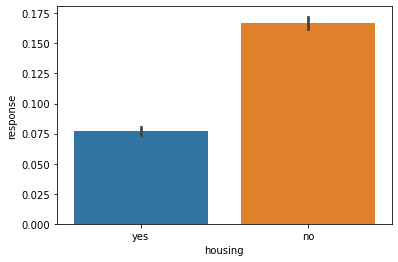

In [40]:
sns.barplot(x = 'housing', y = 'response', data = df)

<AxesSubplot:xlabel='loan', ylabel='response'>

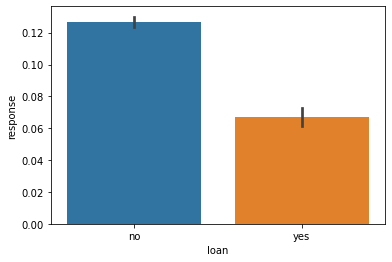

In [41]:
sns.barplot(x = 'loan', y = 'response', data = df)

<AxesSubplot:xlabel='contact', ylabel='response'>

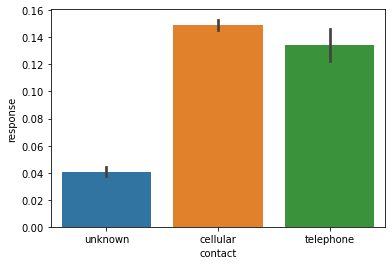

In [42]:
sns.barplot(x = 'contact', y = 'response', data = df)

<AxesSubplot:xlabel='month', ylabel='response'>

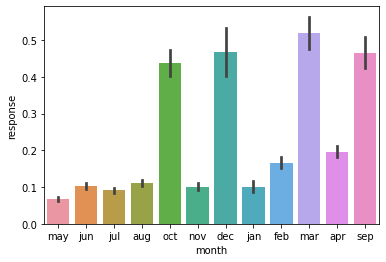

In [43]:
sns.barplot(x='month', y = 'response', data = df)

<AxesSubplot:xlabel='poutcome', ylabel='response'>

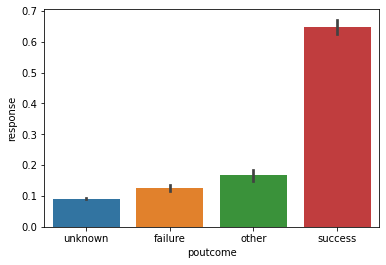

In [44]:
sns.barplot(x = 'poutcome',y= 'response',data = df)

In [45]:
df["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

<AxesSubplot:xlabel='job', ylabel='count'>

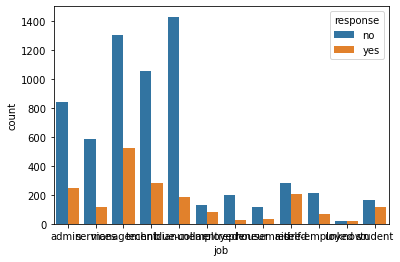

In [35]:
#now we will drop that previous response column and add new response column of numerical values
sns.countplot(data = df, x = "job",hue = "response")

In [47]:
#here we can see that 90% the response is "no " in every column, so we ca drop this because it doesn't matter much

<AxesSubplot:xlabel='marital', ylabel='count'>

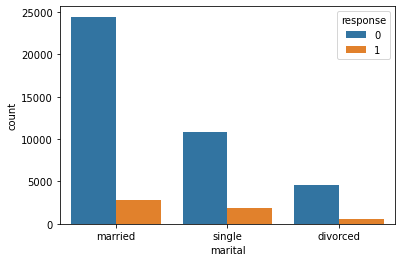

In [48]:
# now we will see the visualization of marital
sns.countplot(data = df, x = "marital", hue = "response")

#here also we see that the maximum response is "no" but as per graph we can see that married people has moere response of yes 
"than single and the least response is of divorced people, so we will drop this column also

<AxesSubplot:xlabel='education', ylabel='count'>

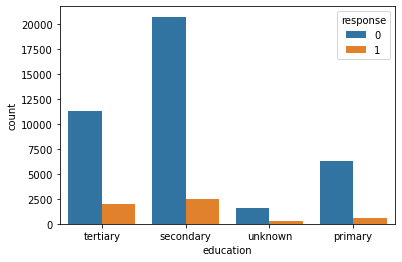

In [49]:
# now we will visualize with education
sns.countplot(data = df,x = "education", hue = "response")

here also its clear than 90% respons no we can drop that too here the secondary education students and given more no response 

<AxesSubplot:xlabel='poutcome', ylabel='count'>

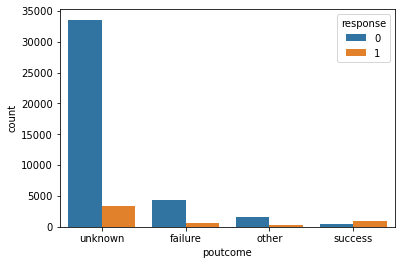

In [50]:
# now we will visualize about poutcome
sns.countplot(data = df,x = "poutcome", hue="response")

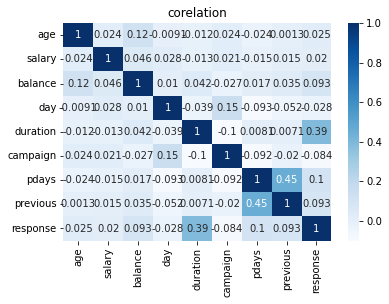

In [51]:
sns.heatmap(df.corr(),annot = True,cmap='Blues')
plt.title("corelation")
plt.show()


#we conclude that pdays are not much related but poutcome is related

now we need to convert the categorical values into numerical values and for that we can use

label encoder

onehot encoder

pd.get_dummies

In [52]:
#we will use label encoder because in pd.get dummies we need to first convert the values then delete that specific columns 
#and then we need to concat that converted columns
from sklearn.preprocessing import LabelEncoder

In [56]:
#now we are going to seprate categorical and umerical value
  #for numerical value

In [58]:
df1 = df[obj_col].apply(LabelEncoder().fit_transform)      #after applying label encoder we converted into numerical value

In [59]:
df1.head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome
0,4,1,2,1,0,1,0,2,8,3
1,9,2,1,1,0,1,0,2,8,3
2,2,1,1,1,0,1,1,2,8,3
3,1,1,3,0,0,1,0,2,8,3
4,11,2,3,0,0,0,0,2,8,3


In [62]:
df2 = df1.join(df[num_col])     #here we are joining df1 which we converted categorical to nuerical and num_col from df

In [63]:
df2

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response
0,4,1,2,1,0,1,0,2,8,3,58,100000,2143.0,5,261.0,1.0,-1,0,0
1,9,2,1,1,0,1,0,2,8,3,44,60000,29.0,5,151.0,1.0,-1,0,0
2,2,1,1,1,0,1,1,2,8,3,33,120000,2.0,5,76.0,1.0,-1,0,0
3,1,1,3,0,0,1,0,2,8,3,47,20000,1506.0,5,92.0,1.0,-1,0,0
4,11,2,3,0,0,0,0,2,8,3,33,0,1.0,5,198.0,1.0,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,9,1,2,1,0,0,0,0,9,3,51,60000,825.0,17,643.0,3.0,-1,0,1
45207,5,0,0,1,0,0,0,0,9,3,71,55000,1729.0,17,456.0,2.0,-1,0,1
45208,5,1,1,1,0,0,0,0,9,2,72,55000,3462.0,17,643.0,5.0,184,3,1
45209,1,1,1,1,0,0,0,1,9,3,57,20000,668.0,17,508.0,4.0,-1,0,0


In [65]:
df2.corr()   #to get the corelation between data

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous,response
job,1.000000,0.062045,0.166707,-0.085926,-0.006853,-0.125363,-0.033004,-0.082063,-0.092870,0.011010,-0.021868,0.141655,0.023913,0.022856,0.002272,0.009462,-0.024455,-0.000911,0.040438
marital,0.062045,1.000000,0.108576,-0.219610,-0.007023,-0.016096,-0.046893,-0.039201,-0.006991,-0.016850,-0.403240,-0.016633,0.007754,-0.005261,0.014829,-0.022779,0.019172,0.014973,0.045588
education,0.166707,0.108576,1.000000,-0.627959,-0.010718,-0.090790,-0.048574,-0.110928,-0.057304,-0.019361,-0.106807,0.425256,0.067476,0.022671,0.001252,-0.001767,0.000052,0.017570,0.066241
targeted,-0.085926,-0.219610,-0.627959,1.000000,0.008825,0.075543,0.066297,0.053247,0.031828,0.011885,0.113202,-0.222868,-0.047823,-0.012891,-0.011140,0.007882,-0.004350,-0.013253,-0.069039
default,-0.006853,-0.007023,-0.010718,0.008825,1.000000,-0.006025,0.077234,0.015404,0.011486,0.034898,-0.017879,0.006860,-0.123657,0.009424,-0.006710,0.015827,-0.029979,-0.018329,-0.022419
housing,-0.125363,-0.016096,-0.090790,0.075543,-0.006025,1.000000,0.041323,0.188123,0.271481,-0.099971,-0.185513,-0.048965,-0.080840,-0.027982,0.004855,-0.038689,0.124178,0.037076,-0.139173
loan,-0.033004,-0.046893,-0.048574,0.066297,0.077234,0.041323,1.000000,-0.010873,0.022145,0.015458,-0.015655,0.017749,-0.119742,0.011370,-0.015421,0.003230,-0.022754,-0.011043,-0.068185
contact,-0.082063,-0.039201,-0.110928,0.053247,0.015404,0.188123,-0.010873,1.000000,0.361145,0.272214,0.026221,-0.108612,-0.037029,-0.027936,-0.030374,0.004242,-0.244816,-0.147811,-0.148395
month,-0.092870,-0.006991,-0.057304,0.031828,0.011486,0.271481,0.022145,0.361145,1.000000,-0.033038,-0.042357,-0.050723,0.018928,-0.006028,0.007998,-0.137349,0.033065,0.022727,-0.024471
poutcome,0.011010,-0.016850,-0.019361,0.011885,0.034898,-0.099971,0.015458,0.272214,-0.033038,1.000000,0.007367,-0.005864,-0.046272,0.083460,0.003037,0.108694,-0.858362,-0.489752,-0.077840


In [66]:
#  now we have done all the processing and now we will train our data into train test split
from sklearn.model_selection import train_test_split

In [67]:
#first we need to define x and y
x = df3.drop("response",axis=1)

In [68]:
y = df["response"]

In [69]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.70, random_state =100) 

In [70]:
x_train[:5]

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous
18391,1,1,1,1,0,0,0,0,5,3,40,20000,3462.0,31,234.0,2.0,-1,0
13056,0,2,1,1,0,0,1,0,5,3,26,50000,-378.0,8,165.0,1.0,-1,0
13415,9,1,2,1,0,1,0,0,5,3,52,60000,3440.0,9,194.0,1.0,-1,0
21022,4,2,2,0,0,0,0,0,1,3,39,100000,668.0,14,297.0,2.0,-1,0
24510,4,1,2,1,0,0,0,0,9,0,50,100000,830.0,17,71.0,1.0,138,2


In [71]:
x_test[:5]

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,age,salary,balance,day,duration,campaign,pdays,previous
14789,1,2,1,1,1,0,1,0,5,3,45,20000,0.0,16,154.0,2.0,-1,0
8968,4,1,2,1,0,0,0,2,6,3,41,100000,5.0,5,178.0,1.0,-1,0
34685,4,2,1,1,0,1,0,0,8,3,40,100000,906.0,5,67.0,4.0,-1,0
2369,0,2,1,1,0,1,0,2,8,3,25,50000,768.0,13,203.0,1.0,-1,0
36561,7,1,0,1,0,1,0,0,8,2,37,70000,0.0,12,631.0,1.0,344,1


In [72]:
y_train[:5]

18391    0
13056    0
13415    0
21022    0
24510    0
Name: response, dtype: int64

Now we will perform the model building operation

In [74]:
from sklearn.linear_model import LogisticRegression


In [75]:
lr = LogisticRegression()

In [76]:
lr.fit(x_train,y_train)

LogisticRegression()

In [78]:
y_pred = lr.predict(x_test)

In [79]:
y_pred[:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [80]:
y_test[:5]

14789    0
8968     0
34685    0
2369     0
36561    0
Name: response, dtype: int64

In [86]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [82]:
print(confusion_matrix(y_test,y_pred))

[[11696   289]
 [ 1329   250]]


In [83]:
print(f1_score(y_test,y_pred))

0.23607176581680836


In [84]:
print(accuracy_score(y_test,y_pred))

0.8807136537894427


In [85]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11985
           1       0.46      0.16      0.24      1579

    accuracy                           0.88     13564
   macro avg       0.68      0.57      0.59     13564
weighted avg       0.85      0.88      0.85     13564



precision = to check how many outcomes are actuaally positive outcomes
precision = tp/tp+fp

recall = to check correctly positive predicted outcomes
tp/tp+fn

f1_score = where the contribution of precision and recall are same


In [87]:
print(r2_score(y_test,y_pred))      #here the if the score is less then the accuracy is more 

-0.1597012626348695


In [89]:
from sklearn.feature_selection import RFE    #rfe  = recursive feature selection it should be not less and not much high

In [92]:
rfe = RFE(lr,5)      #here we are passing lr into it and we are passing 5 for performing 5 different analysis

In [94]:
rfe.fit(x_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [ ]:
from sklearn.model_selection import cross_val_score

In [97]:
print(cross_val_score(lr,x_train,y_train,cv=5))

[0.88309637 0.88262243 0.87533576 0.87738979 0.88197188]


In [98]:
#here we are finding the mean value of cross validation score
print(np.mean(cross_val_score(lr,x_train,y_train,cv=5)))

0.8800832447843462


#we have one different method which we can perform for getting all the results at a single place by using only few lines of
codes

In [100]:
import statsmodels.api as sm
x_train_sm = sm.add_constant(x_train)

In [101]:
#fitting the reg line using ols
lr  = sm.OLS(y_train,x_train_sm).fit()

In [102]:
lr.params

const       -1.172419e-01
job          1.329033e-03
marital      1.726475e-02
education    1.052477e-02
targeted    -2.372368e-02
default     -1.937201e-02
housing     -8.355828e-02
loan        -4.130371e-02
contact     -3.849905e-02
month        4.602469e-03
poutcome     2.602628e-02
age          8.900620e-04
salary      -1.402481e-07
balance      1.410558e-05
day         -4.171643e-04
duration     6.885614e-04
campaign    -6.673196e-03
pdays        4.100545e-04
previous     6.857106e-03
dtype: float64

In [104]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     469.5
Date:                Mon, 28 Mar 2022   Prob (F-statistic):               0.00
Time:                        23:17:53   Log-Likelihood:                -5265.2
No. Observations:               31647   AIC:                         1.057e+04
Df Residuals:                   31628   BIC:                         1.073e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1172      0.017     -6.928      0.000      -0.150      -0.084
job            0.0013      0.001      2.634      0.008       0.000       0.002
marital        0.0173      0.003      5.806      0.000       0.011       0.023
education      0.0105      0.003      3.486      0.000       0.005       0.016
targeted      -0.0237      0.006     -4.301      0.000      -0.035      -0.013
default       -0.0194      0.012     -1.568      0.117      -0.044       0.005
housing       -0.0836      0.004    -23.646      0.000      -0.090      -0.077
loan          -0.0413      0.004     -9.254      0.000      -0.050      -0.033
contact       -0.0385      0.002    -18.698      0.000      -0.043      -0.034
month          0.0046      0.001      7.674      0.000       0.003       0.006
poutcome       0.0260      0.003      7.918      0.000       0.020       0.032
age            0.0009      0.000      5.177      0.000       0.001       0.001
salary     -1.402e-07   5.62e-08     -2.496      0.013    -2.5e-07   -3.01e-08
balance     1.411e-05   1.41e-06     10.012      0.000    1.13e-05    1.69e-05
day           -0.0004      0.000     -2.123      0.034      -0.001    -3.2e-05
duration       0.0007   9.16e-06     75.189      0.000       0.001       0.001
campaign      -0.0067      0.001     -6.472      0.000      -0.009      -0.005
pdays          0.0004   3.17e-05     12.918      0.000       0.000       0.000
previous       0.0069      0.001      9.219      0.000       0.005       0.008
==============================================================================
Omnibus:                     8930.650   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21346.059
Skew:                           1.590   Prob(JB):                         0.00
Kurtosis:                       5.464   Cond. No.                     7.05e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# now we will perform this by using Random forest

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
rfc = RandomForestClassifier()

In [108]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [110]:
y_pred1 = rfc.predict(x_test)

In [109]:
print(np.mean(cross_val_score(rfc,x_train,y_train,cv = 5)))

0.9016651702574249


In [113]:
print(confusion_matrix(y_test,y_pred1))

[[11616   369]
 [  965   614]]


In [115]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11985
           1       0.62      0.39      0.48      1579

    accuracy                           0.90     13564
   macro avg       0.77      0.68      0.71     13564
weighted avg       0.89      0.90      0.89     13564



In [116]:
import statsmodels.api as sm
x_train_sm = sm.add_constant(x_train)

In [117]:
rfc = sm.OLS(y_train,x_train_sm).fit()

In [120]:
rfc.params

const       -1.172419e-01
job          1.329033e-03
marital      1.726475e-02
education    1.052477e-02
targeted    -2.372368e-02
default     -1.937201e-02
housing     -8.355828e-02
loan        -4.130371e-02
contact     -3.849905e-02
month        4.602469e-03
poutcome     2.602628e-02
age          8.900620e-04
salary      -1.402481e-07
balance      1.410558e-05
day         -4.171643e-04
duration     6.885614e-04
campaign    -6.673196e-03
pdays        4.100545e-04
previous     6.857106e-03
dtype: float64

In [122]:
rfc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     469.5
Date:                Mon, 28 Mar 2022   Prob (F-statistic):               0.00
Time:                        23:31:29   Log-Likelihood:                -5265.2
No. Observations:               31647   AIC:                         1.057e+04
Df Residuals:                   31628   BIC:                         1.073e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1172      0.017     -6.928      0.000      -0.150      -0.084
job            0.0013      0.001      2.634      0.008       0.000       0.002
marital        0.0173      0.003      5.806      0.000       0.011       0.023
education      0.0105      0.003      3.486      0.000       0.005       0.016
targeted      -0.0237      0.006     -4.301      0.000      -0.035      -0.013
default       -0.0194      0.012     -1.568      0.117      -0.044       0.005
housing       -0.0836      0.004    -23.646      0.000      -0.090      -0.077
loan          -0.0413      0.004     -9.254      0.000      -0.050      -0.033
contact       -0.0385      0.002    -18.698      0.000      -0.043      -0.034
month          0.0046      0.001      7.674      0.000       0.003       0.006
poutcome       0.0260      0.003      7.918      0.000       0.020       0.032
age            0.0009      0.000      5.177      0.000       0.001       0.001
salary     -1.402e-07   5.62e-08     -2.496      0.013    -2.5e-07   -3.01e-08
balance     1.411e-05   1.41e-06     10.012      0.000    1.13e-05    1.69e-05
day           -0.0004      0.000     -2.123      0.034      -0.001    -3.2e-05
duration       0.0007   9.16e-06     75.189      0.000       0.001       0.001
campaign      -0.0067      0.001     -6.472      0.000      -0.009      -0.005
pdays          0.0004   3.17e-05     12.918      0.000       0.000       0.000
previous       0.0069      0.001      9.219      0.000       0.005       0.008
==============================================================================
Omnibus:                     8930.650   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21346.059
Skew:                           1.590   Prob(JB):                         0.00
Kurtosis:                       5.464   Cond. No.                     7.05e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""